### Limpeza de Dados

Os processos de limpeza e preparação de dados são muito importantes. Dados limpos, completos e organizados tornam as análises mais fáceis e confiáveis. Abaixo descrevemos alguns dos principais mecanismos para tratar dados que tenham algum problema.

Execute cada célula de código abaixo para ver o resultado.

## Leitura e análise inicial dos dados


In [25]:
#importação de bibliotecas
import pandas as pd

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../data/aluguel-com-erros.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [26]:
df.head(10)

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,Rua Jose Loureiro,2,0,81,0,1100,1100,23/08/17
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17
7,469,NaN,1,0,30,0,550,210,03/07/17
8,24,R. Desembargador Westphalen,1,0,60,1,800,120,30/09/17
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17


O método `info` é útil para vermos quais colunas do DataFrame tiveram seus tipos de dados corretamente identificados pelo Pandas. No caso abaixo já é possível identificar alguns problemas. As colunas *quartos, suite, area, aluguel e condomínio* foram interpretadas como objetos genéricos enquanto deveriam ser numéricas. A coluna *data* deveria ser do tipo `datetype`.

O método `info` também nos informa quantos valores cada coluna tem. Veja abaixo que a coluna *endereço* tem apenas 19 valores.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   codigo      20 non-null     int64 
 1   endereco    19 non-null     object
 2   quartos     20 non-null     int64 
 3   suite       20 non-null     object
 4   area        20 non-null     object
 5   vaga        20 non-null     int64 
 6   aluguel     20 non-null     object
 7   condominio  20 non-null     object
 8   data        20 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.5+ KB


## Localizando e tratando valores inválidos

Uma forma prática de identificar potenciais problemas é exibir todas as linhas com valores em branco (*NaN*). Abaixo podemos verificar que uma das linhas não tem o valor para a coluna *endereco*.

In [28]:
df[df.isna().any(axis=1)]

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
7,469,NaN,1,0,30,0,550,210,03/07/17


Podemos usar o método `fillna` para substituir os valores em branco por um valor definido, neste caso a *String* "Desconhecido". Após a substituição não há mais linhas com valores em branco.

In [29]:
df['endereco'] = df['endereco'].fillna("Desconhecido")

df[df.isna().any(axis=1)]

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data


Podemos também fazer substituições de partes das *strings* no DataFrame. Por exemplo, podemos padronizar ruas e avenidas com as abreviações R. e Av. O código abaixo faz isto:

In [30]:
df['endereco'] = df['endereco'].str.replace('Rua', 'R.')
df['endereco'] = df['endereco'].str.replace('Avenida', 'Av.')

df.head()

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,R. Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,R. Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,R. Jose Loureiro,2,0,81,0,1100,1100,23/08/17
3,82,R. Lourenço Pinto,2,0,50,0,1350,300,19/09/17
4,2970,R. Lourenço Pinto,2,0,63,0,1300,300,05/08/17


Ainda não sabemos por que diversas colunas numéricas foram identificadas com o tipo genérico *objeject*. Uma forma de averiguar é listar todos os valores não repetidos de uma coluna. O método `unique` é útil neste caso. Abaixo podemos ver que a coluna *aluguel* contém uma ou mais interrogações (?) entre os valores.

In [31]:
df['aluguel'].unique()

array(['900', '650', '1100', '1350', '1300', '550', '800', '1800', '600',
       '750', '560', '?'], dtype=object)

Vamos então exibir todas as linhas com interrogações em alguma coluna. O comando abaixo identificou que a linha de índice 19 contém vários valores representados com uma interrogação.

In [32]:
df[df['aluguel'] == '?']

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
19,44803,R. Rockefeller,2,?,?,1,?,?,19/07/17


Como a linha identificada acima tem muitos valores inválidos, podemos decidir retirá-la do DataFrame. Para isso, usamos o método `drop`. Perceba que a linha não aparece mais no DataFrame.

In [33]:
df = df.drop(19)

df

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,R. Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,R. Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,R. Jose Loureiro,2,0,81,0,1100,1100,23/08/17
3,82,R. Lourenço Pinto,2,0,50,0,1350,300,19/09/17
4,2970,R. Lourenço Pinto,2,0,63,0,1300,300,05/08/17
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17
7,469,Desconhecido,1,0,30,0,550,210,03/07/17
8,24,R. Desembargador Westphalen,1,0,60,1,800,120,30/09/17
9,74,Av. Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17


## Conversão de tipos

Como pode ser visto pela execução do método `info` abaixo, as colunas ainda possuem tipos incorretos. Precisamos então fazer a conversão manual dos tipos.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   codigo      19 non-null     int64 
 1   endereco    19 non-null     object
 2   quartos     19 non-null     int64 
 3   suite       19 non-null     object
 4   area        19 non-null     object
 5   vaga        19 non-null     int64 
 6   aluguel     19 non-null     object
 7   condominio  19 non-null     object
 8   data        19 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.5+ KB


Para converter as colunas para os tipos adequados, usamos o método `astype`. Podemos tanto aplicar a uma coluna por vez ou em várias colunas representadas por um dicionário. O código abaixo exemplifica as duas abordagens:

In [12]:
df['suite'] = df['suite'].astype(int)

df = df.astype({'area': int, 'aluguel': float, 'condominio': float})

Para uma coluna com datas, precisamos usar um comando diferente, o `to_datetime`. Ao executar o comando abaixo obtemos um erro informando que há um valor de data contendo 'janeiro 17', que não pode ser interpretado pelo método.

In [13]:
df['data'] = pd.to_datetime(df['data'])

ParserError: Unknown string format: janeiro 17

Abaixo substituimos o valor com problema e com isso conseguimos converter corretamente a coluna.

In [14]:
df['data'] = df['data'].str.replace('janeiro 17', '01/01/17')

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y')

Agora podemos conferir os tipos e verificar que estão todos corretos:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   codigo      19 non-null     int64         
 1   endereco    19 non-null     object        
 2   quartos     19 non-null     int64         
 3   suite       19 non-null     int64         
 4   area        19 non-null     int64         
 5   vaga        19 non-null     int64         
 6   aluguel     19 non-null     float64       
 7   condominio  19 non-null     float64       
 8   data        19 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 1.5+ KB


Com todos os tipos convertidos corretamente, podemos aplicar funções estatísticas e exibir corretamente os valores em gráficos como mostrado abaixo:

Média do aluguel:  895.2631578947369


<AxesSubplot:xlabel='data'>

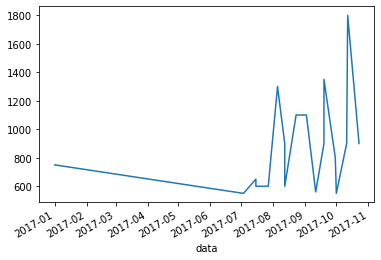

In [16]:
print('Média do aluguel: ', df['aluguel'].mean())

df.set_index('data')['aluguel'].plot()

## Identificando outliers

Outliers são valores fora da faixa esperada para uma observação. Um forma conveniente de identificar outliers é usando BoxPlots. Abaixo podemos perceber que existem dois valores de condomínio fora do que seria esperado (mostrados como círculos abaixo e acima da caixa).

<AxesSubplot:>

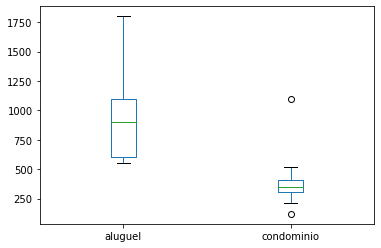

In [17]:
df[['aluguel', 'condominio']].plot.box()

Outra forma de identificar outliers é calcular os *z-scores* para uma variável. O z-score fornece informação sobre o quão inesperado um valor é considerando os demais valores presentes. Abaixo calculamos os z-scores para a variável condomínio. Veja que um valor 'inesperado' é o 120 com z-score -1.3, indicando que é um valor mais baixo que o esperado. O outro outlier é o de condomínio 1100 com z-score 3.7 indicando que está muito acima do esperado. Em geral valores de z-score abaixo de -3 e acima de +3 são fortes candidados a serem outliers.

In [18]:
df['condominio_zscore'] = (df['condominio'] - df['condominio'].mean())/df['condominio'].std()

df.sort_values('condominio_zscore')

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data,condominio_zscore
8,24,R. Desembargador Westphalen,1,0,60,1,800.0,120.0,2017-09-30,-1.330867
7,469,Desconhecido,1,0,30,0,550.0,210.0,2017-07-03,-0.869903
18,2381,R. Rockefeller,2,0,54,0,900.0,240.0,2017-09-19,-0.716248
3,82,R. Lourenço Pinto,2,0,50,0,1350.0,300.0,2017-09-19,-0.408938
4,2970,R. Lourenço Pinto,2,0,63,0,1300.0,300.0,2017-08-05,-0.408938
15,59375,Av. Silva Jardim,1,0,33,0,560.0,305.0,2017-09-11,-0.383329
10,9850,Av. Visconde de Guarapuava,1,0,64,1,600.0,326.0,2017-07-15,-0.275770
13,568,R. Alferes Poli,1,0,43,0,600.0,330.0,2017-08-12,-0.255283
16,80,R. Desembargador Westphalen,1,0,80,1,900.0,350.0,2017-08-12,-0.152846
14,294579,Av. Silva Jardim,1,0,36,0,550.0,350.0,2017-10-01,-0.152846


Uma possibilidade para eliminar o valor que está muito acima seria excluir a linha que o contém. O problema disso é que perderíamos todos os dados da linha, que inclui dadados aparentemente corretos. Uma forma de manter os dados corretos e ao mesmo tempo minimizar a influência do valor incorreto é substituir o valor incorreto pela média dos demais valores para a variável, como fazemos abaixo. Veja que agora o valor de condomínio para a linha problemática é 379.84.

In [20]:
df.loc[2, 'condominio'] = df['condominio'].mean()

df

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data,condominio_zscore
0,34,R. Desembargador Westphalen,2,0,90,0,900.0,371.000000,2017-10-11,-0.045288
1,167,R. Jose Loureiro,2,0,64,0,650.0,428.000000,2017-07-15,0.246657
2,6784,R. Jose Loureiro,2,0,81,0,1100.0,341.939058,2017-08-23,3.688527
3,82,R. Lourenço Pinto,2,0,50,0,1350.0,300.000000,2017-09-19,-0.408938
4,2970,R. Lourenço Pinto,2,0,63,0,1300.0,300.000000,2017-08-05,-0.408938
5,34197,Alameda Doutor Muricy,2,0,80,1,900.0,410.000000,2017-10-23,0.154464
6,5072,Alameda Doutor Muricy,2,0,84,0,1100.0,382.000000,2017-09-02,0.011052
7,469,Desconhecido,1,0,30,0,550.0,210.000000,2017-07-03,-0.869903
8,24,R. Desembargador Westphalen,1,0,60,1,800.0,120.000000,2017-09-30,-1.330867
9,74,Av. Visconde de Guarapuava,2,1,132,1,1800.0,520.000000,2017-10-12,0.717865


## Escrevendo os dados limpos no disco

Para salvar os dados limpos em um arquivo, usamos o método `to_csv`, como no exemplo abaixo:

In [21]:
df.to_csv('../data/aluguel-limpo.csv', index=False)